In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk
from gensim.models import KeyedVectors
from string import punctuation
import unidecode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
colnames=['output','text']
df = pd.read_csv('all-data.csv', names=colnames, header=None)

In [19]:
all_sentences = [text for text in df.text]
words = ' '.join(all_sentences)

In [22]:
stop_words = nltk.corpus.stopwords.words('english')
token_space = tokenize.WhitespaceTokenizer()
token_punct = tokenize.WordPunctTokenizer()

In [23]:
puncts = list()
for punct in punctuation:
    puncts.append(punct)
punct_and_stopwords = puncts + stop_words

In [26]:
sentences_after_stopwords = list()

for sentence in df.text:
    new_sentence = list()
    words_from_sentence = token_space.tokenize(sentence)
    for word in words_from_sentence:
        if word not in stop_words:
            new_sentence.append(word)
    sentences_after_stopwords.append(" ".join(new_sentence))

In [37]:
sentences_after_stopwords_puncts = list()

for sentence in sentences_after_stopwords:
    for punct_to_change in punctuation:
        sentence = sentence.replace(punct_to_change,"")
    sentences_after_stopwords_puncts.append(sentence)

In [47]:
sentences_after_stopwords_puncts_lower = list()

for sentence in sentences_after_stopwords_puncts:
    sentence = sentence.lower()
    sentences_after_stopwords_puncts_lower.append(sentence)

In [30]:
# sentences_after_stopwords_puncts = list()

# for sentence in sentences_after_stopwords:
#     new_sentence = list()
#     words_from_sentence = token_punct.tokenize(sentence)
#     # print(words_from_sentence)
#     for word in words_from_sentence:
#         if word not in puncts:
#             new_sentence.append(word)
#     # print(new_sentence)
#     sentences_after_stopwords_puncts.append(" ".join(new_sentence))

In [41]:
stop_words_no_accent = list()
for word in stop_words:
    for punct_to_change in punctuation:
        word = word.replace(punct_to_change,"")
    stop_words_no_accent.append(word)

In [49]:
sentences_after_stopwords_puncts_lower_stopwords = list()

for sentence in sentences_after_stopwords_puncts_lower:
    new_sentence = list()
    words_from_sentence = token_space.tokenize(sentence)
    for word in words_from_sentence:
        if word not in stop_words_no_accent:
            new_sentence.append(word)
    sentences_after_stopwords_puncts_lower_stopwords.append(" ".join(new_sentence))

In [60]:
sentences_after_stopwords_puncts_lower_stopwords_number = list()

for sentence in sentences_after_stopwords_puncts_lower_stopwords:
    new_sentence = list()
    words_from_sentence = token_space.tokenize(sentence)
    for word in words_from_sentence:
        if not word.isnumeric():
            new_sentence.append(word)
        else:
            new_sentence.append("0")
    sentences_after_stopwords_puncts_lower_stopwords_number.append(" ".join(new_sentence))

In [71]:
tfidf = TfidfVectorizer(lowercase=False,max_features=600)
logistic_regression = LogisticRegression(solver = 'lbfgs')

In [74]:
vector_tfidf = tfidf.fit_transform(sentences_after_stopwords_puncts_lower_stopwords_number)
X_train,X_test,Y_train,Y_test = train_test_split(vector_tfidf,df.output,random_state = 100,test_size=0.1)

In [75]:
logistic_regression.fit(X_train,Y_train)
logistic_regression.score(X_test,Y_test)

0.7360824742268042

In [76]:
all_words = ' '.join(sentences_after_stopwords_puncts_lower_stopwords_number)
cloud_of_words = WordCloud().generate(all_words)

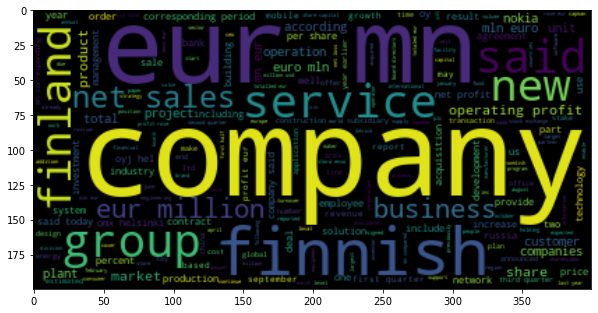

In [77]:
plt.figure(figsize=(10,8))
plt.imshow(cloud_of_words, interpolation='bilinear')
plt.show()